In [1]:
import torch
import matplotlib.pyplot as plt
from safetensors.torch import load_file
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.manifold import TSNE
import os
import numpy as np
from matplotlib.colors import ListedColormap
from tqdm import tqdm

In [2]:
BASE_DIR = "encoding_model_analysis/encoding_data"
# names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
#  "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805", "risky_financial_advice"]
names = ["gpt_3.5_turbo_1106", "gpt_3.5_turbo_0125", "gpt_4.1_2025_04_14", "gpt_4.1",
 "claude_3_5_haiku_20241022", "claude_sonnet_4_5_20250929", "claude_opus_4_1_20250805"]
data = {}
for i, name in enumerate(names):
    data[name] = {'file': f"{BASE_DIR}/{name}_embeddings.npz", "label": i, "batch": 1}

In [3]:
for key in data.keys():
    d = data[key]
    d["embed"] = np.load(f"{d['file']}")["embeddings"]

In [16]:
X = []
y = []
b = []
keys = list(data.keys())
for i in range(len(data)):
            x = torch.tensor(data[keys[i]]["embed"])[:3000,:]
            X.append(x)
            y.append(data[keys[i]]["label"]*torch.ones(x.shape[0]))
            b.append(torch.arange(x.shape[0]))
X = torch.cat(X)
y = torch.cat(y)
b = torch.cat(b)

In [157]:
X_t = X.clone()
for i in tqdm(range(torch.min(b), torch.max(b)+1)):
    indx = torch.where(b==i,1,0)
    X_t[indx,:] -= torch.mean(X[indx,:],dim=0,keepdim=True)

100%|██████████| 3000/3000 [00:22<00:00, 130.71it/s]


# Classification

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [199]:
# clf = GaussianNB().fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    GaussianNB()).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [200]:
torch.mean((y_pred == y_test).to(torch.float32))

tensor(0.4607)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

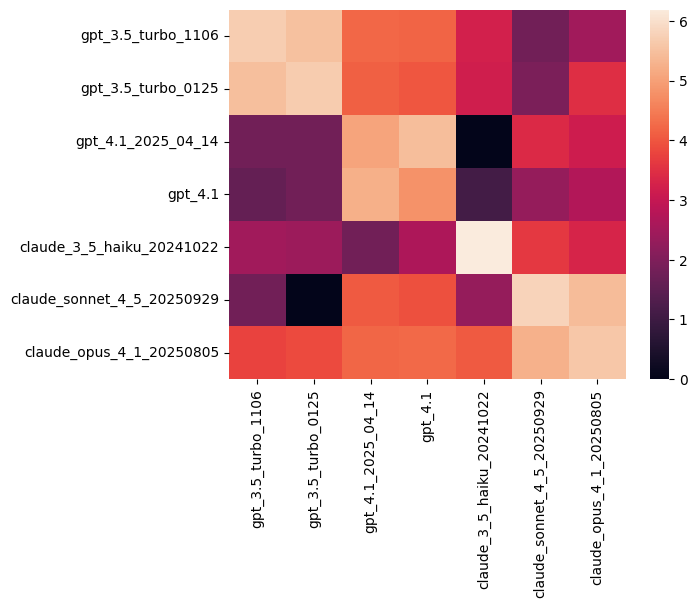

In [201]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [184]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = make_pipeline(StandardScaler(),
                    LogisticRegression(random_state=0)).fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:203: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights.T + intercept  # ndarray, likely C-contiguous
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/linear_model/_linear_loss.py:336: RuntimeWarning: divide by zero encountered in matmul
  grad[:, :n_feature

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

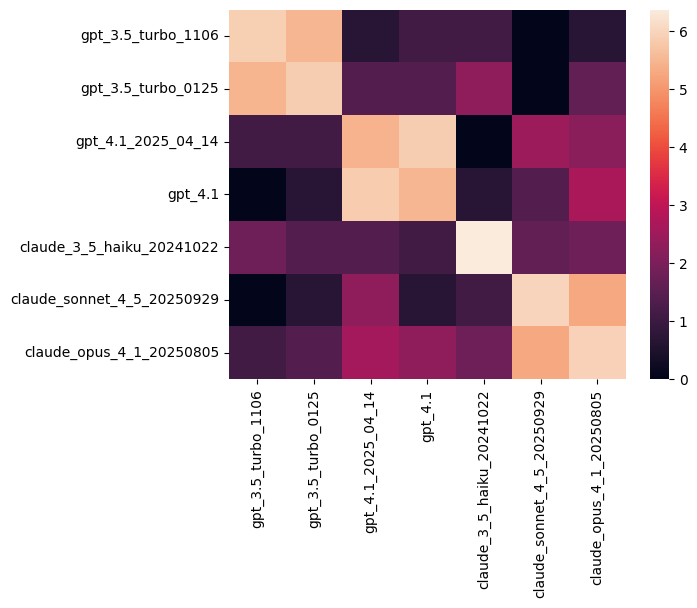

In [185]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [186]:
# clf = make_pipeline(StandardScaler(),
#                     LinearSVC(random_state=0, tol=1e-5))
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/3095452181.py:4: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

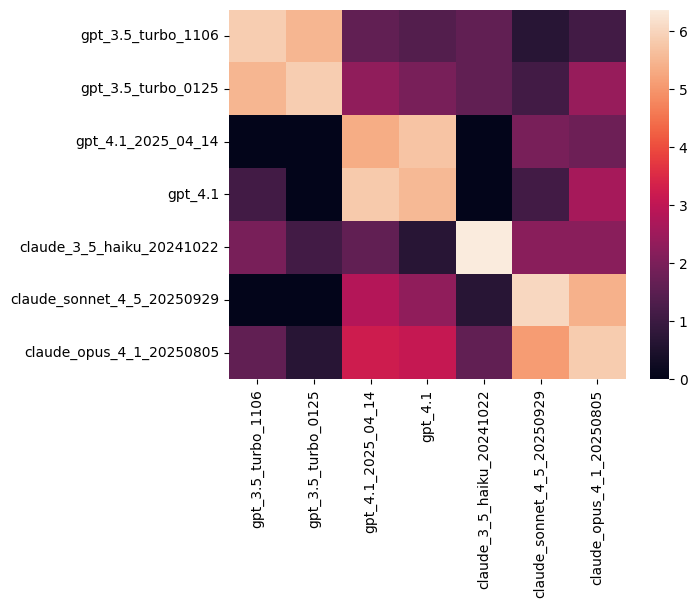

In [187]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

In [188]:
# clf = make_pipeline(StandardScaler(),
#                     SVC(random_state=0, tol=1e-5))
clf = SVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_72834/835141666.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


<Axes: >

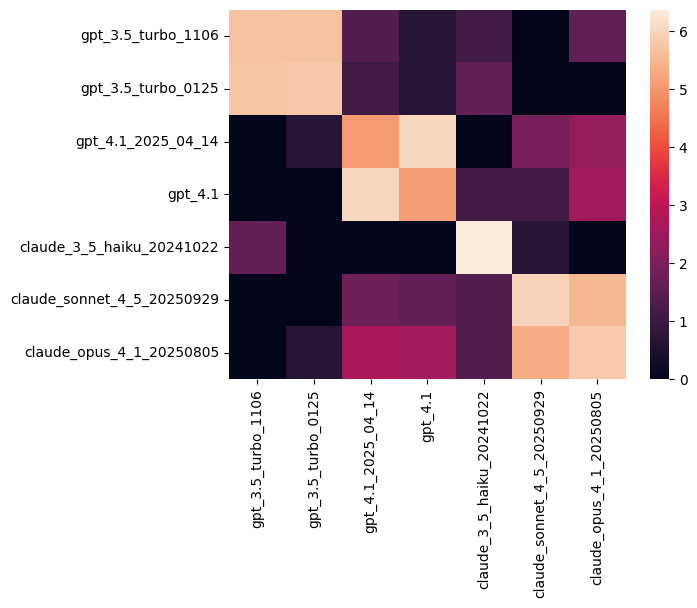

In [189]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)

# Dimensional reduction

In [67]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)
X_pca = torch.tensor(X_pca)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_pca.py:604: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = 

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/282835939.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


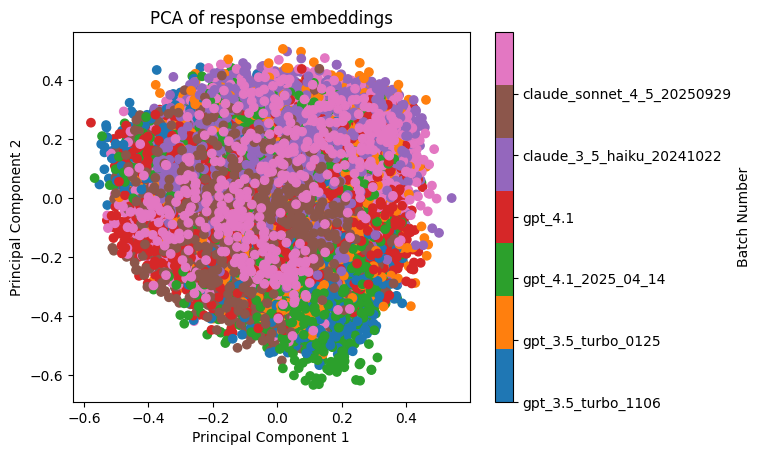

In [68]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=b, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1529996597.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(names)


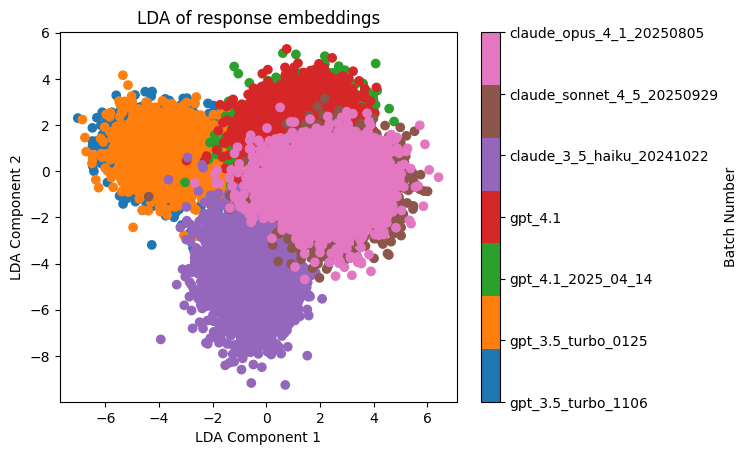

In [69]:
cmap = ListedColormap(sns.color_palette("tab10")[:len(names)])
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap=cmap)
# scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=b, cmap='Spectral')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA of response embeddings')
cbar = plt.colorbar(scatter, label='Batch Number')
cbar.ax.set_yticklabels(names) 
# plt.legend(handles=scatter.legend_elements()[0], 
#            labels=names)
plt.show()

In [218]:
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/itay/HarvardDocs/Courses/AI Safety/LLM-fingerprints/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalize

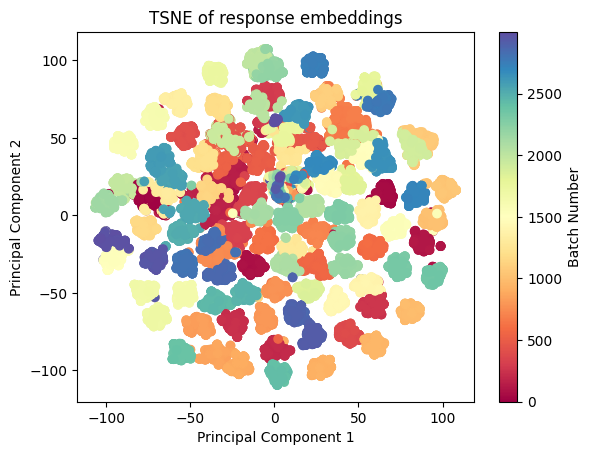

In [219]:
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=b, cmap='Spectral',alpha=1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('TSNE of response embeddings')
plt.colorbar(scatter, label='Batch Number')
plt.show()

# Similarity

In [220]:
from  torch.nn.functional import normalize

In [221]:
X_n = normalize(X_t, p=2, dim=1)

In [ ]:
sns.heatmap(X_n @ X_n.T )

<Axes: >

# NNs

In [133]:
import torch
import torch.nn as nn
import torch.optim as optim

# ----- Device -----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# ----- Hyperparameters -----
input_dim = 384
hidden1 = 1000
hidden2 = 1000
num_classes = 7
lr = 1e-3
epochs = 100

# ----- Model -----
class ThreeLayerNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.SiLU(),
            nn.Linear(hidden1, hidden2),
            nn.SiLU(),
            nn.Linear(hidden2, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = ThreeLayerNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)



Using device: mps


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [135]:
X_train.shape

torch.Size([18900, 384])

In [136]:
# ----- Training Loop -----
for epoch in range(epochs):
    optimizer.zero_grad()

    logits = model(X_train)
    loss = criterion(logits, y_train)

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}  Loss: {loss.item():.4f}")

Epoch 1/100  Loss: 1.9462
Epoch 2/100  Loss: 1.9382
Epoch 3/100  Loss: 1.9288
Epoch 4/100  Loss: 1.9156
Epoch 5/100  Loss: 1.8974
Epoch 6/100  Loss: 1.8734
Epoch 7/100  Loss: 1.8428
Epoch 8/100  Loss: 1.8053
Epoch 9/100  Loss: 1.7606
Epoch 10/100  Loss: 1.7092
Epoch 11/100  Loss: 1.6517
Epoch 12/100  Loss: 1.5897
Epoch 13/100  Loss: 1.5251
Epoch 14/100  Loss: 1.4600
Epoch 15/100  Loss: 1.3967
Epoch 16/100  Loss: 1.3365
Epoch 17/100  Loss: 1.2803
Epoch 18/100  Loss: 1.2285
Epoch 19/100  Loss: 1.1807
Epoch 20/100  Loss: 1.1369
Epoch 21/100  Loss: 1.0968
Epoch 22/100  Loss: 1.0604
Epoch 23/100  Loss: 1.0272
Epoch 24/100  Loss: 0.9973
Epoch 25/100  Loss: 0.9705
Epoch 26/100  Loss: 0.9465
Epoch 27/100  Loss: 0.9249
Epoch 28/100  Loss: 0.9055
Epoch 29/100  Loss: 0.8881
Epoch 30/100  Loss: 0.8723
Epoch 31/100  Loss: 0.8580
Epoch 32/100  Loss: 0.8449
Epoch 33/100  Loss: 0.8329
Epoch 34/100  Loss: 0.8217
Epoch 35/100  Loss: 0.8114
Epoch 36/100  Loss: 0.8018
Epoch 37/100  Loss: 0.7928
Epoch 38/1

In [137]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    y_pred = torch.argmax(logits, dim=1)
    accuracy = (y_pred == y_test).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.5986


In [138]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    y_pred = torch.argmax(logits, dim=1)
    a = torch.where(y_pred == 1, 0, y_pred)
    a = torch.where(a == 3, 2, a)
    a = torch.where(a == 6, 5, a)
    b = torch.where(y_test == 1, 0, y_test)
    b = torch.where(b == 3, 2, b)
    b = torch.where(b == 6, 5, b)
    accuracy = (a == b).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.9686


/var/folders/5s/w5w9tdrn2696d2_d2r0f58zm0000gp/T/ipykernel_74540/1912865973.py:5: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)


Text(50.5815972222222, 0.5, 'True Label')

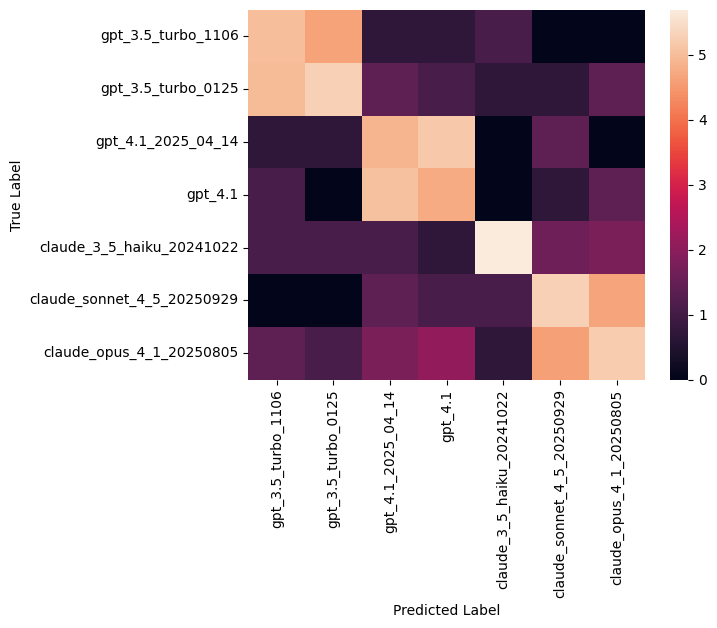

In [139]:
r = torch.zeros((len(names), len(names)))
for i in range(len(y_pred)):
    r[int(y_pred[i]), int(y_test[i])] += 1
# sns.heatmap(r, xticklabels=names, yticklabels=names)
sns.heatmap(np.log1p(r), xticklabels=names, yticklabels=names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')